In [24]:
import time
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline

In [26]:
def fib(n):
  if n <= 0: # base case 1
    return 0
  if n <= 1: # base case 2
    return 1
  else: # recursive step
    return fib(n-1) + fib(n-2)

calculated = {}

def fib_dp(n):
  if n == 0: # base case 1
    return 0
  if n == 1: # base case 2
    return 1
  elif n in calculated:
    return calculated[n]
  else: # recursive step
    calculated[n] = fib(n-1) + fib(n-2)
    return calculated[n]

time_to_compute_rec = []
time_to_compute_dp = []

<ipython-input-27-348e3e6a4664>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


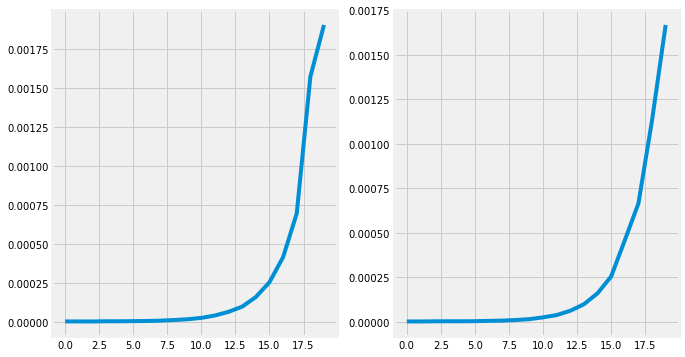

In [27]:
numbers = 20
for _ in range(20):
    start_time = time.time()
    fib(_)
    end_time = time.time()
    time_to_compute_rec.append(end_time - start_time)
    
    
    
for _ in range(20):
    start_time = time.time()
    fib_dp(_)
    end_time = time.time()
    time_to_compute_dp.append(end_time - start_time)

fig,axs = plt.subplots(1,2, figsize = (10,6))
axs[0].plot(time_to_compute_rec)
axs[1].plot(time_to_compute_dp)
fig.show()

In [28]:
def fib(n):
  if n == 0:
    return 0
  if n == 1:
    return 1
  # table for tabulation
  table = [None] * (n+1) 
  table[0] = 0        # base case 1, fib(0) = 0
  table[1] = 1        # base case 2, fib(1) = 1
  # filling up tabulation table starting from 2 and going upto n
  for i in range(2,n+1):  
    # we have result of i-1 and i-2 available because these had been evaluated already
    table[i] = table[i-1] + table[i-2]  
  # return the value of n in tabulation table
  return table[n]    

print(fib(100))

354224848179261915075


In [29]:
memo = {} #dictionay for Memoization

def fib(n):
  if n == 0: # base case 1
    return 0
  if n == 1: # base case 2
    return 1
  elif n in memo: # Check if result for n has already been evaluated
    return memo[n] # return the result if it is available
  else: # otherwise recursive step
    memo[n] = fib(n-1) + fib(n-2) # store the result of n in memoization dictionary
    return memo[n] # return the value

print (fib(100))

354224848179261915075


### Knapsack Problem

In [166]:
#dictionay for Memoization
memo = {} 
def max_fn(i,w_optim):
    
    ## base case
    if i == 0:
        return 0
    elif (i,w_optim) in memo:
        return max_fn(i,w_optim)
    else:
        if weights[i] > w_optim: 
            memo[(i,w_optim)] = max_fn(i-1,w_optim)
        else:
            memo[(i,w_optim)] = max(max_fn(i-1,w_optim), max_fn(i-1,w_optim - weights[i]) + prices[i])
        return memo[(i,w_optim)]
def knapsack(weights, prices,capacity): 
    return max_fn(np.size(weights) - 1,capacity)


In [167]:
prices = np.array([50,100,150,200])
weights = np.array([8,16,32,40] )
capacity = 64
knapsack(weights,prices,capacity)

300

In [168]:
memo

{(1, 64): 100,
 (1, 32): 100,
 (2, 64): 250,
 (1, 24): 100,
 (2, 24): 100,
 (3, 64): 300}

In [171]:
# a dynamic approach
# Returns the maximum value that can be stored by the bag
def knapSack(W, wt, val, n):
   K = [[0 for x in range(W + 1)] for x in range(n + 1)]
   #Table in bottom up manner
   for i in range(n + 1):
      for w in range(W + 1):
         if i == 0 or w == 0:
            K[i][w] = 0
         elif wt[i-1] <= w:
            K[i][w] = max(val[i-1] + K[i-1][w-wt[i-1]], K[i-1][w])
         else:
            K[i][w] = K[i-1][w]
   return K,K[n][W]
#Main
val = [50,100,150,200]
wt = [8,16,32,40]
W = 64
n = len(val)
print(knapSack(W, wt, val, n))

([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50], [0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150], [0, 0, 0, 0, 0, 0, 0, 0, 50, 50, 50, 50, 50, 50, 50, 50, 100, 100, 100, 100, 100, 100, 100, 100, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 150, 200, 200, 200, 200, 200, 200, 200, 200, 250, 250, 250, 250, 250, 25

### Balanced Paranthesis

In [227]:
string_to_check = ''

In [228]:
stack = []
open_brackets = ['{','(','[']
close_brackets = ['}',')',']']
try:
    for _str in string_to_check:
        if _str in open_brackets:
            stack.append(_str)
        elif (_str in close_brackets) and stack[-1] == open_brackets[close_brackets.index(_str)]:
            stack.pop()
        if len(stack) == 0:
            print('valid')
        else:
            print('invalid') 
except :
    print('invalid')


In [248]:
class Solution(object):
    def minPathSum(self, grid):
        """
        :type grid: List[List[int]]
        :rtype: int
        """
        M, N = len(grid), len(grid[0])
        for i in range(M):
            grid[i][0] = grid[i][0] + grid[i-1][0] if i > 0 else grid[i][0]
            for j in range(1,N):
                grid[i][j] = min(grid[i-1][j], grid[i][j-1]) + grid[i][j] if i > 0 else grid[i][j-1]+grid[i][j]
        return grid[-1][-1]

